In [9]:
from dolomites import koil
import matplotlib.pyplot as plt
import numpy as np
import math,cmath

w = koil.m_phase_winding()
m = 3   # number of phases
Q = 12  # number of slots
p = 5   # number of pole pairs

# let ask koil to compute the symmetrical and balanced winding
w.compute_winding(m,Q,p,single_layer=False)

[0,
 0,
 0,
 0.9999999999999999,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1.0,
 0,
 0,
 0,
 0]

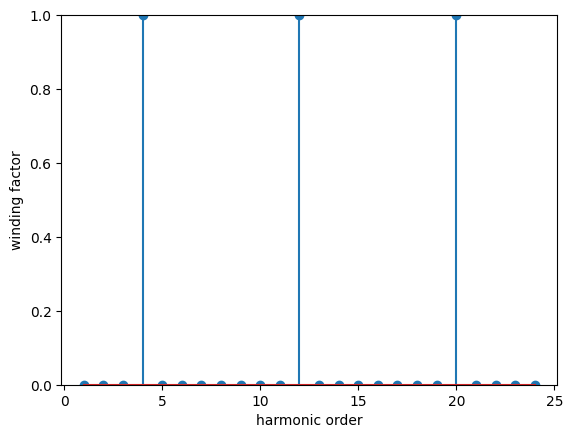

In [5]:
# make a histogram for the winding factors
# only one phase is considered
# let note that third harmoics are present in each phase

nu = []
kw = []
for _nu in range(1,25):
    nu.append(_nu)
    kw.append(w.windings[0].get_kw(_nu))

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.stem(nu,kw)
plt.ylim([0,1])
plt.xlabel('harmonic order')
plt.ylabel('winding factor');
kw

[0, 300.0, 300.0, 300.0, 300.0, 0.0, 0.0, 450.0, 450.0, -150.0, -150.0, 300.0, 300.0, 0.0, 0.0, 0.0, 0.0, 300.0, 300.0, -150.0, -150.0, 450.0, 450.0, 0.0]
[-150.0, 150.0, 150.0, 150.0, 150.0, -150.0, -150.0, 300.0, 300.0, -300.0, -300.0, 150.0, 150.0, -150.0, -150.0, -150.0, -150.0, 150.0, 150.0, -300.0, -300.0, 300.0, 300.0, -150.0]


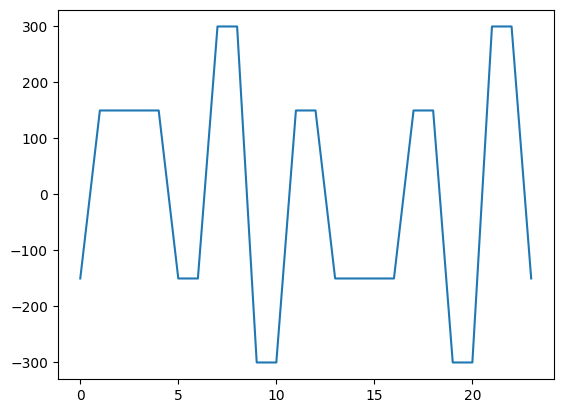

In [15]:

w.calc_harmonics(93.6e-3,ws=2e-3, cur=[100,-50,-50])
x,y = w.calc_mmf()

plt.figure()
plt.plot(y)

In [6]:
for _w in w.windings:
    print(_w.get_slot_matrix())

a,b,c,phi,d = w.calc_harmonics(100e-3,nu_max=1000,ws=2e-3, cur=[100,-50,-50])
#a,b,c,phi,d,e = w.calc_harmonics(45e-3,nu_max=1000,ws=0e-3, cur=[0,-50,50])


[ 0.  1.  0.  0. -1.  0.  0.  1.  0.  0. -1.  0.  0.  1.  0.  0. -1.  0.
  0.  1.  0.  0. -1.  0.]
[-1.  0.  0.  1.  0.  0. -1.  0.  0.  1.  0.  0. -1.  0.  0.  1.  0.  0.
 -1.  0.  0.  1.  0.  0.]
[ 0.  0. -1.  0.  0.  1.  0.  0. -1.  0.  0.  1.  0.  0. -1.  0.  0.  1.
  0.  0. -1.  0.  0.  1.]


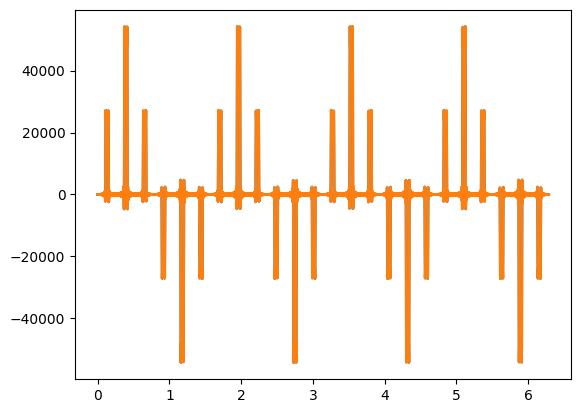

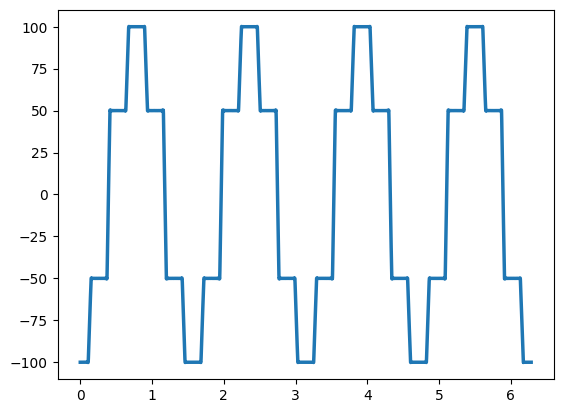

In [7]:

nu = range(0,1000)

#fig, ax = plt.subplots()
#ax.stem(nu,a)
#plt.ylim([0,1])
#plt.xlabel('harmonic order')
#plt.ylabel('mmf harmonics');
#%%
x = np.linspace(0,2*math.pi,10000)

Ks=[]
Ks1=[]
for k in nu:
    y = a[k]*np.cos(k*x)+b[k]*np.sin(k*x)
    y1 = c[k]*np.sin(k*x+phi[k])
    for j in range(len(y)):
        if len(Ks) == 0:
            Ks = y
            Ks1=y1
        else:
            Ks[j]=Ks[j]+y[j]
            Ks1[j]=Ks1[j]+y1[j]

fig, ax = plt.subplots()
ax.plot(x, Ks, linewidth=2.0)
ax.plot(x, Ks1, linewidth=2.0)

#ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()
 #%%



xx = np.linspace(0,2*math.pi,10000)
MMF=[]
for k in nu:
    y = d[k]*np.cos(k*xx+phi[k])
    for j in range(len(y)):
        if len(MMF) == 0:
            MMF = y
        else:
            MMF[j]=MMF[j]+y[j]

fig, ax = plt.subplots()


ax.plot(xx, MMF, linewidth=2.5)

plt.show()